In [11]:
%pylab inline
import scipy

from pyiga import bspline, assemble, geometry, vis

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [12]:
# define geometry
geo = geometry.quarter_annulus()

# define discretization space
p = 3     # spline degree
kvs = 2 * (bspline.make_knots(p, 0.0, 1.0, 50),)

In [13]:
g = lambda x,y: np.exp(-(x-.8)**2 - (y-.8)**2)  # Dirichlet BC function
f = lambda x,y: 3 * np.sin(10*x) * np.cos(10*y) # source term

# compute Dirichlet boundary conditions
bcs = assemble.compute_dirichlet_bcs(kvs, geo, [('left', g), ('top', g)])

# compute right-hand side from function f
rhs = assemble.inner_products(kvs, f, f_physical=True, geo=geo).ravel()

In [14]:
# set up and solve linear system
A = assemble.stiffness(kvs, geo)
LS = assemble.RestrictedLinearSystem(A, rhs, bcs)

u = scipy.sparse.linalg.spsolve(LS.A, LS.b)
u_func = geometry.BSplineFunc(kvs, LS.complete(u))

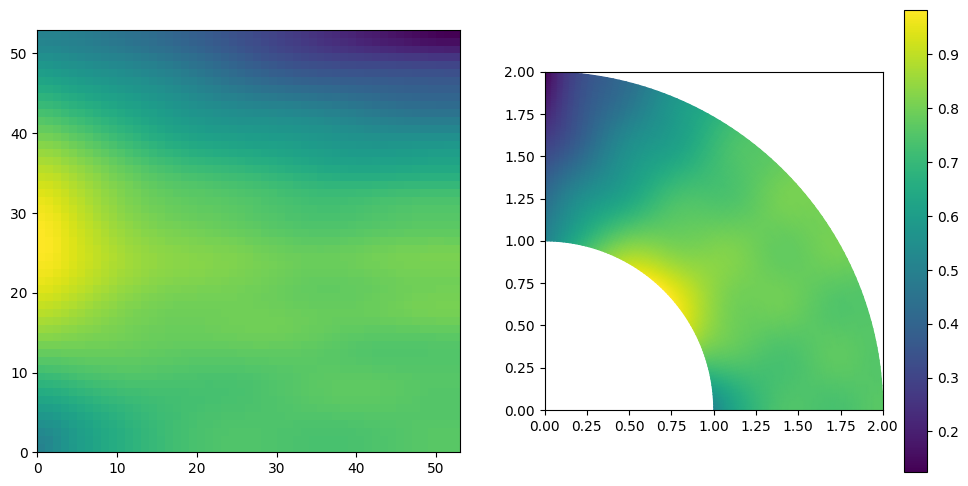

In [15]:
# plot coefficients and solution
figsize(12,6)

subplot(1,2,1)
pcolormesh(u_func.coeffs)
gca().set_aspect('equal')

subplot(1,2,2)
vis.plot_field(u_func, geo)
gca().set_aspect('equal')
colorbar();